In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/GFDL-ESM4_diag_2014(0317).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [5]:
data['k_no_ho2'].median()

8.561410403251648e-12

In [6]:
data['k_no_ch3o2'].median()

8.199165630340576e-12

In [7]:
data['k_o3_oh'].median()

6.151859760284424e-14

In [8]:
data['k_o3_ho2'].median()

1.8025909995254195e-15

In [9]:
data['k_ch3o2_ch3o2'].median()

3.7371995894389584e-13

In [10]:
data['a'] = 2*data['k_ho2_ho2']
data['b'] = data['k_o3_ho2']*data['o3_mole'] + data['k_no_ho2']*data['no_mole']
data['c'] = -data['lossco_mole'] - data['k_o3_oh']*data['o3_mole']*data['oh_mole']

In [11]:
data['ho2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [12]:
data['ho2_mole'].describe()

count    9.720000e+05
mean     7.819105e+07
std      8.553780e+07
min      7.030353e+03
25%      1.074628e+07
50%      4.597495e+07
75%      1.171130e+08
max      4.880270e+08
Name: ho2_mole, dtype: float64

In [13]:
data['oh_mole'].describe()

count    9.720000e+05
mean     9.021275e+05
std      9.455746e+05
min      3.652127e+01
25%      1.292676e+05
50%      6.191394e+05
75%      1.431918e+06
max      1.838665e+07
Name: oh_mole, dtype: float64

In [14]:
data['ratio_ho2_oh'] = data['ho2_mole']/data['oh_mole']
data['ratio_ho2_oh'].describe()

count    972000.000000
mean        158.843528
std         126.837121
min           0.138275
25%          54.243301
50%         146.189126
75%         227.288911
max         891.296949
Name: ratio_ho2_oh, dtype: float64

In [15]:
data['P1'] = data['k_no_ho2']*data['no_mole']*data['ho2_mole']
data['P1_frac'] = data['P1']/data['o3prod_mole']
data['P1_frac'].describe()

count    972000.000000
mean          0.466095
std           0.241811
min           0.003979
25%           0.302577
50%           0.486591
75%           0.611504
max           3.434336
Name: P1_frac, dtype: float64

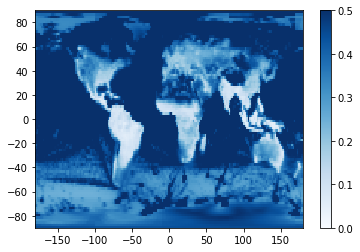

In [16]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P1_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

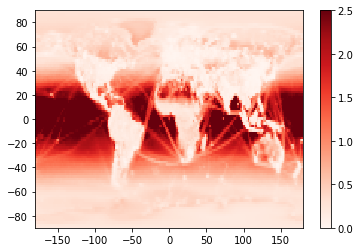

In [17]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ho2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [25]:
data['P3'] = data['o3prod_mole'] - data['P1'] - data['P2']
data['P3_frac'] = data['P3']/data['o3prod_mole']
data['P3_frac'].describe()

count    972000.000000
mean          0.002922
std           0.598571
min         -14.037569
25%          -0.293629
50%           0.051743
75%           0.335310
max           0.976786
Name: P3_frac, dtype: float64

In [18]:
data = data.drop(['a','b','c','country_y'], axis=1)
data = data.rename(columns={'country_x':'country'})
data

,longitude,latitude,t,loc,o3,o3prod,o3loss,emivoc,eminox,tas,...,ratio_ch3o2_oh,P2,P2_frac,P5,P5_frac,lossco_mole,ho2_mole,ratio_ho2_oh,P1,P1_frac
0,1.0,-89.0,1.0,911.0,1.809749e-08,5.713640e-14,7.210932e-14,0.0,4.642811e-17,241.67470,...,66.542485,18385.411743,0.534342,9047.459428,0.208350,73033.888612,5.190974e+07,109.646240,29951.759798,0.870500
1,3.0,-89.0,1.0,2911.0,1.809673e-08,5.712156e-14,7.206955e-14,0.0,4.575431e-17,241.61029,...,66.442818,18377.773569,0.534259,9041.853762,0.208336,73005.266046,5.187812e+07,109.558368,29957.222913,0.870885
2,5.0,-89.0,1.0,4911.0,1.809596e-08,5.710639e-14,7.202893e-14,0.0,4.506594e-17,241.54594,...,66.342414,18369.948055,0.534174,9036.231687,0.208324,72976.023214,5.184609e+07,109.469864,29962.580776,0.871272
3,7.0,-89.0,1.0,6911.0,1.809518e-08,5.709094e-14,7.198753e-14,0.0,4.436449e-17,241.48166,...,66.241407,18361.956147,0.534086,9030.592914,0.208314,72946.238402,5.181372e+07,109.380832,29967.845454,0.871661
4,9.0,-89.0,1.0,8911.0,1.809437e-08,5.707516e-14,7.194526e-14,0.0,4.364817e-17,241.41748,...,66.139700,18353.771549,0.533995,9024.936569,0.208306,72915.803214,5.178093e+07,109.291168,29972.990408,0.872052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,-9.0,89.0,60.0,-8911.0,3.021567e-08,6.217139e-16,6.243434e-14,0.0,7.853882e-13,240.51016,...,5.455662,89.751655,0.239724,31.617429,0.000841,849.904492,5.074200e+04,50.494623,819.806307,2.189676
971996,-7.0,89.0,60.0,-6911.0,3.021529e-08,6.242805e-16,6.259491e-14,0.0,7.908349e-13,240.53856,...,5.422428,90.016527,0.239443,31.715378,0.000841,852.393806,5.059151e+04,50.205982,822.572438,2.188032
971997,-5.0,89.0,60.0,-4911.0,3.021489e-08,6.269057e-16,6.275914e-14,0.0,7.964060e-13,240.56699,...,5.388836,90.287463,0.239158,31.815442,0.000842,854.939907,5.043928e+04,49.913985,825.399584,2.186358
971998,-3.0,89.0,60.0,-2911.0,3.021450e-08,6.295834e-16,6.292666e-14,0.0,8.020886e-13,240.59546,...,5.354986,90.563819,0.238869,31.917432,0.000842,857.537015,5.028582e+04,49.619536,828.281223,2.184660


In [19]:
list(data)

['longitude',
 'latitude',
 't',
 'loc',
 'o3',
 'o3prod',
 'o3loss',
 'emivoc',
 'eminox',
 'tas',
 'hus',
 'aod',
 'bldep',
 'ua',
 'va',
 'jno2',
 'photo1d',
 'lossch4',
 'lossco',
 'no2',
 'no',
 'oh',
 'pan',
 'hno3',
 'k_no_ho2',
 'k_no_ch3o2',
 'k_o1d_h2o',
 'k_o3_ho2',
 'k_o3_oh',
 'K1_NO_HO2',
 'K1_NO_CH3O2',
 'K1_O1D_H2O',
 'K1_O3_OH',
 'K1_O3_HO2',
 'K2_NO_HO2',
 'K2_NO_CH3O2',
 'K2_O1D_H2O',
 'K2_O3_OH',
 'K2_O3_HO2',
 'country',
 'o3_mole',
 'no_mole',
 'no2_mole',
 'oh_mole',
 'hno3_mole',
 'pan_mole',
 'k_ho2_ho2',
 'k_oh_no2',
 'o3prod_mole',
 'o3loss_mole',
 'lossch4_mole',
 'k_ch3o2_ch3o2',
 'ch3o2_mole',
 'ratio_ch3o2_oh',
 'P2',
 'P2_frac',
 'P5',
 'P5_frac',
 'lossco_mole',
 'ho2_mole',
 'ratio_ho2_oh',
 'P1',
 'P1_frac']

In [20]:
data['P6'] = data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']
data['P6_frac'] = data['P6']/data['o3loss_mole']

In [23]:
data['ratio_P1_P2'] = data['P1']/data['P2']
data['ratio_P1_P2'].describe()

count    972000.000000
mean          1.803357
std           1.948743
min           0.009571
25%           0.610200
50%           1.323061
75%           2.519464
max         158.745389
Name: ratio_P1_P2, dtype: float64

In [21]:
data['ratio_P5_P6'] = data['P5']/data['P6']
data['ratio_P5_P6'].describe()

count    972000.000000
mean          1.321726
std           4.737419
min           0.027476
25%           0.135068
50%           0.226474
75%           0.639242
max         244.414062
Name: ratio_P5_P6, dtype: float64

In [28]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/GFDL-ESM4_diag_2014(0318).csv', index = False)

In [26]:
data_land = data.dropna()
ratio_P1_P2 = data_land['ratio_P1_P2'].median()
ratio_P5_P6 = data_land['ratio_P5_P6'].median()
P1_frac = data_land['P1_frac'].mean()
P2_frac = data_land['P2_frac'].mean()
P3_frac = data_land['P3_frac'].mean()
P5_frac = data_land['P5_frac'].mean()
P6_frac = data_land['P6_frac'].mean()
ratio_ho2_oh = data_land['ratio_ho2_oh'].median()
ratio_ch3o2_oh = data_land['ratio_ch3o2_oh'].median()

In [27]:
print("P1 fraction:    "+str(np.round(P1_frac,2)))
print("P2 fraction:    "+str(np.round(P2_frac,2)))
print("P3 fraction:    "+str(np.round(P3_frac,2)))
print("P5 fraction:    "+str(np.round(P5_frac,2)))
print("P6 fraction:    "+str(np.round(P6_frac,2)))
print("P1:P2 ratio:    "+str(np.round(ratio_P1_P2,2)))
print("P5:P6 ratio:    "+str(np.round(ratio_P5_P6,2)))
print("HO\u2082:OH ratio:   "+str(np.round(ratio_ho2_oh,1)))
print("CH\u2083O\u2082:OH ratio: "+str(np.round(ratio_ch3o2_oh,1)))

P1 fraction:    0.37
P2 fraction:    0.33
P3 fraction:    0.3
P5 fraction:    0.09
P6 fraction:    0.3
P1:P2 ratio:    2.44
P5:P6 ratio:    0.6
HO₂:OH ratio:   56.7
CH₃O₂:OH ratio: 21.6
